In [204]:
# imports
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import seaborn as sns

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [193]:
# load crash data
crash_data = pd.read_csv('../../data/crash_data_normalized.csv')

# examine head
crash_data.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1,2021-04-13,21:35,BROOKLYN,11217.0,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
1,43,2021-04-13,20:34,BROOKLYN,11213.0,40.668495,-73.925606,"(40.668495, -73.925606)",EASTERN PARKWAY,BUFFALO AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4408259,Sedan,NaN,NaN,NaN,NaN
2,51,2021-04-15,12:05,NaN,NaN,40.761436,-73.769950,"(40.761436, -73.76995)",BELL BOULEVARD,NaN,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4407636,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,52,2021-04-16,11:00,QUEENS,11368.0,40.749580,-73.865410,"(40.74958, -73.86541)",NaN,NaN,100-10 ROOSEVELT AVENUE,1.0,0.0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4407792,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
4,62,2021-04-15,20:13,BRONX,10457.0,40.847440,-73.899680,"(40.84744, -73.89968)",EAST TREMONT AVENUE,PARK AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4407797,NaN,NaN,NaN,NaN,NaN


In [194]:
#look at columns
crash_data.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [195]:
vehicle_columns = [ 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

all_vehicle_types = []
i=1
for col in vehicle_columns:
    all_vehicle_types+=set(crash_data[col])
    i+=1

all_vehicle_types = set(all_vehicle_types)
all_vehicle_types

# bike related value is 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'

{"''lime mope",
 '3-Door',
 '4 dr sedan',
 'AMB',
 'AMBU',
 'AMBUL',
 'AMBULANCE',
 'Ambulance',
 'Armored Truck',
 'BICYCLE',
 'BOX',
 'BOX T',
 'BOX TRUCK',
 'BTM',
 'BUs',
 'Backhoe Lo',
 'Beverage Truck',
 'Bike',
 'Box Truck',
 'Bulk Agriculture',
 'Bus',
 'CEMENT TRU',
 'COM',
 'COMME',
 'COMMERCIAL',
 'COURIER VA',
 'Carry All',
 'Cement tru',
 'Chassis Cab',
 'Commercial',
 'Concrete Mixer',
 'Const',
 'Convertible',
 'DELIV',
 'DELIVERY',
 'DELV',
 'DIRT',
 'DIRT BIKE',
 'DIRTBIKE',
 'DODGE RAM',
 'DOLLAR VAN',
 'Dirt Bike',
 'Dirt bike',
 'Dump',
 'E - B',
 'E BIK',
 'E BIKE',
 'E SCO',
 'E bik',
 'E bike',
 'E-BIKE',
 'E-Bik',
 'E-Bike',
 'E-Sco',
 'E-Scooter',
 'E-bik',
 'E-bike',
 'EBIKE',
 'ELEC. UNIC',
 'ELECT',
 'ELECTRIC S',
 'Elect',
 'FDNY',
 'FDNY AMBUL',
 'FDNY Ambul',
 'FDNY FIRE',
 'FIRE ENGIN',
 'FIRE TRUCK',
 'FORK',
 'FORKL',
 'Fire Truck',
 'Flat Bed',
 'Flat Rack',
 'Ford Van',
 'Ford sprin',
 'Fork lift',
 'Forklift',
 'Front-Load',
 'GARBAGE TR',
 'GAS POW

In [196]:
# leaving out 'dirt bike', 'dirtbike', 'Minibike','Minicycle','Dirt Bike','Dirt bike','pedicab','Pedicab'
# look at 'DELIV','DELIVERY', 'DELV'
bike_values= ['Bike','BICYCLE','uni e-bike','e-bike','ebike','E - B','E BIK','E BIKE','E bik','E bike','E-BIKE','E-Bik','E-Bike','E-bik','E-bike','EBIKE']

# see how many bike_values involved in crashes
crash_data.head()
for col in vehicle_columns:
    for value in bike_values:
        print(col, " ", value, " count: ", sum(crash_data[col]==value))
       

VEHICLE TYPE CODE 1   Bike  count:  3842
VEHICLE TYPE CODE 1   BICYCLE  count:  1
VEHICLE TYPE CODE 1   uni e-bike  count:  0
VEHICLE TYPE CODE 1   e-bike  count:  0
VEHICLE TYPE CODE 1   ebike  count:  1
VEHICLE TYPE CODE 1   E - B  count:  1
VEHICLE TYPE CODE 1   E BIK  count:  1
VEHICLE TYPE CODE 1   E BIKE  count:  0
VEHICLE TYPE CODE 1   E bik  count:  1
VEHICLE TYPE CODE 1   E bike  count:  1
VEHICLE TYPE CODE 1   E-BIKE  count:  2
VEHICLE TYPE CODE 1   E-Bik  count:  73
VEHICLE TYPE CODE 1   E-Bike  count:  1016
VEHICLE TYPE CODE 1   E-bik  count:  0
VEHICLE TYPE CODE 1   E-bike  count:  1
VEHICLE TYPE CODE 1   EBIKE  count:  0
VEHICLE TYPE CODE 2   Bike  count:  10498
VEHICLE TYPE CODE 2   BICYCLE  count:  0
VEHICLE TYPE CODE 2   uni e-bike  count:  1
VEHICLE TYPE CODE 2   e-bike  count:  1
VEHICLE TYPE CODE 2   ebike  count:  0
VEHICLE TYPE CODE 2   E - B  count:  0
VEHICLE TYPE CODE 2   E BIK  count:  0
VEHICLE TYPE CODE 2   E BIKE  count:  1
VEHICLE TYPE CODE 2   E bik  coun

In [197]:
# map values to BICYCLE and EBIKE
bike_value_mapper = {'BICYCLE':'BICYCLE','Bike':'BICYCLE','EBIKE':'EBIKE','uni e-bike':'EBIKE','e-bike':'EBIKE','ebike':'EBIKE','E - B':'EBIKE','E BIK':'EBIKE','E BIKE':'EBIKE','E bik':'EBIKE',
                     'E bike':'EBIKE','E-BIKE':'EBIKE','E-Bik':'EBIKE','E-Bike':'EBIKE','E-bik':'EBIKE','E-bike':'EBIKE'
                    }

for col in vehicle_columns:
    crash_data[col] =  crash_data[col].map(bike_value_mapper)
    
crash_data.head()

,Unnamed: 0,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,1,2021-04-13,21:35,BROOKLYN,11217.0,40.683580,-73.976170,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,NaN,NaN,NaN,NaN,NaN
1,43,2021-04-13,20:34,BROOKLYN,11213.0,40.668495,-73.925606,"(40.668495, -73.925606)",EASTERN PARKWAY,BUFFALO AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4408259,NaN,NaN,NaN,NaN,NaN
2,51,2021-04-15,12:05,NaN,NaN,40.761436,-73.769950,"(40.761436, -73.76995)",BELL BOULEVARD,NaN,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4407636,NaN,NaN,NaN,NaN,NaN
3,52,2021-04-16,11:00,QUEENS,11368.0,40.749580,-73.865410,"(40.74958, -73.86541)",NaN,NaN,100-10 ROOSEVELT AVENUE,1.0,0.0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4407792,NaN,BICYCLE,NaN,NaN,NaN
4,62,2021-04-15,20:13,BRONX,10457.0,40.847440,-73.899680,"(40.84744, -73.89968)",EAST TREMONT AVENUE,PARK AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,4407797,NaN,NaN,NaN,NaN,NaN


In [198]:
for col in vehicle_columns:
    for value in ['BICYCLE','EBIKE']:
        print(col, " ", value, " count: ", sum(crash_data[col]==value))

VEHICLE TYPE CODE 1   BICYCLE  count:  3843
VEHICLE TYPE CODE 1   EBIKE  count:  1097
VEHICLE TYPE CODE 2   BICYCLE  count:  10498
VEHICLE TYPE CODE 2   EBIKE  count:  2060
VEHICLE TYPE CODE 3   BICYCLE  count:  126
VEHICLE TYPE CODE 3   EBIKE  count:  25
VEHICLE TYPE CODE 4   BICYCLE  count:  17
VEHICLE TYPE CODE 4   EBIKE  count:  3
VEHICLE TYPE CODE 5   BICYCLE  count:  3
VEHICLE TYPE CODE 5   EBIKE  count:  0


In [199]:
crash_data.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME',
       'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [363]:
# create column with year value
crash_data['YEAR'] = crash_data['CRASH DATE'].str[:4]

# group by year
yearly_num_injured_or_killed = crash_data.groupby('YEAR', as_index=False).agg({'NUMBER OF CYCLIST INJURED':sum,'NUMBER OF CYCLIST KILLED':sum, 'NUMBER OF PEDESTRIANS INJURED':sum, 'NUMBER OF PEDESTRIANS KILLED':sum}).copy()

# filter to 2019 and 2020
year_2019_2020_injury = yearly_num_injured_or_killed.loc[(yearly_num_injured_or_killed['YEAR'].str[:] != '2021')]
year_2019_2020_injury

# num cyclists injured went up from 2019 to 2020 while num cyclist killed, ped injured and ped killed went down

,YEAR,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
0,2019,4710,29,10183,123
1,2020,5265,24,6396,93


In [518]:
# create column with year and month value
crash_data['YEAR_MONTH'] = crash_data['CRASH DATE'].str[:7]

# group by year and month
year_month_num_injured_or_killed = crash_data.groupby('YEAR_MONTH', as_index=False).agg({'NUMBER OF CYCLIST INJURED':sum,'NUMBER OF CYCLIST KILLED':sum, 'NUMBER OF PEDESTRIANS INJURED':sum, 'NUMBER OF PEDESTRIANS KILLED':sum}).copy()

# filter to 2019 and 2020
year_month_2019_2020_injury = year_month_num_injured_or_killed.loc[(year_month_num_injured_or_killed['YEAR_MONTH'].str[:4] != '2021')].copy()
year_month_2019_2020_injury.rename(columns={'YEAR_MONTH':'YEAR-MONTH'},inplace=True)
year_month_2019_2020_injury['MONTH_NUM'] = year_month_2019_2020_injury.index
year_month_2019_2020_injury
# num cyclists injured went up from 2019 to 2020 while num cyclist killed, ped injured and ped killed went down

,YEAR-MONTH,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,MONTH_NUM
0,2019-01,208,3,994,10,0
1,2019-02,209,2,808,9,1
2,2019-03,251,1,823,10,2
3,2019-04,360,3,724,8,3
4,2019-05,446,3,868,10,4
5,2019-06,510,2,724,9,5
6,2019-07,576,4,686,9,6
7,2019-08,597,1,696,11,7
8,2019-09,560,4,786,8,8
9,2019-10,458,4,900,9,9


In [501]:
# create trend df
year_month_2019_trend = year_month_2019_2020_injury.loc[(year_month_2019_2020_injury['YEAR-MONTH'] == '2019-01') | (year_month_2019_2020_injury['YEAR-MONTH'] == '2020-12')]
year_month_2019_trend

,YEAR-MONTH,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
0,2019-01,208,3,994,10
23,2020-12,306,3,574,4


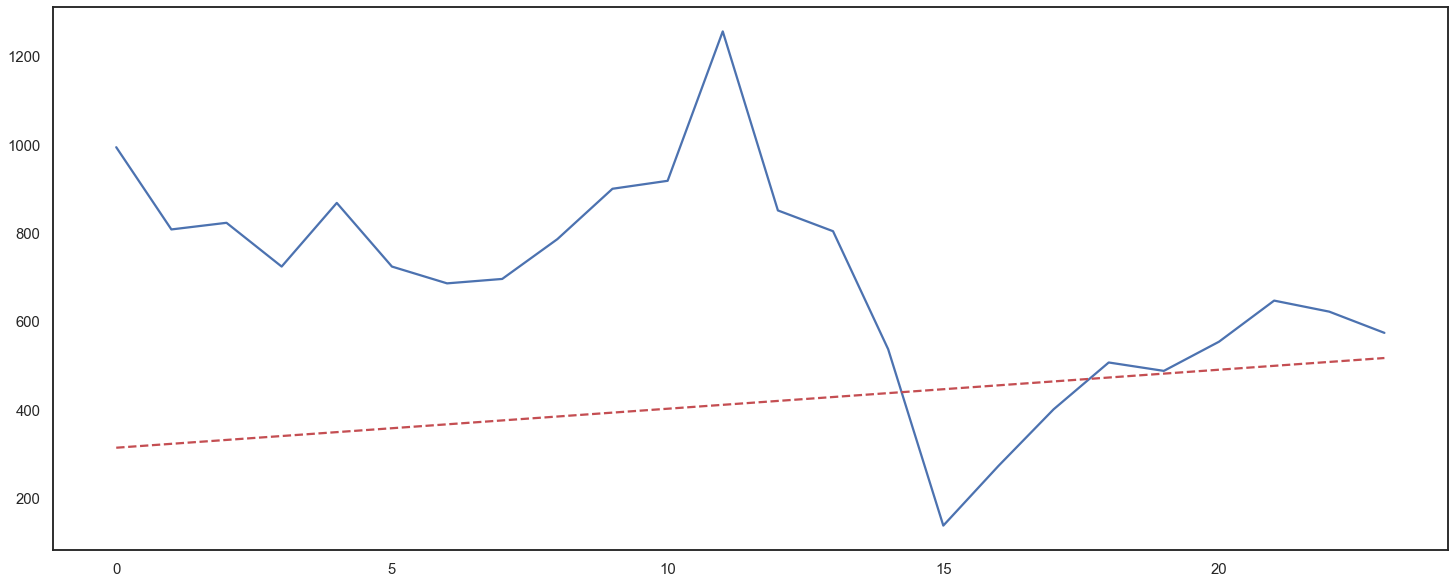

-18.417826086956566
902.5966666666671


In [531]:
x = year_month_2019_2020_injury['MONTH_NUM']
y = year_month_2019_2020_injury['NUMBER OF PEDESTRIANS INJURED']
plt.plot(x,y)
z = np.polyfit(x, y, 1)
slope,intercept = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()
print(slope)
print(intercept)

[Text(0.5, 1.0, 'Cyclists & Pedestrians Injured 2019 - 2020'),
 Text(0.5, 0, 'Month-Year'),
 Text(0, 0.5, 'Number of Injured')]

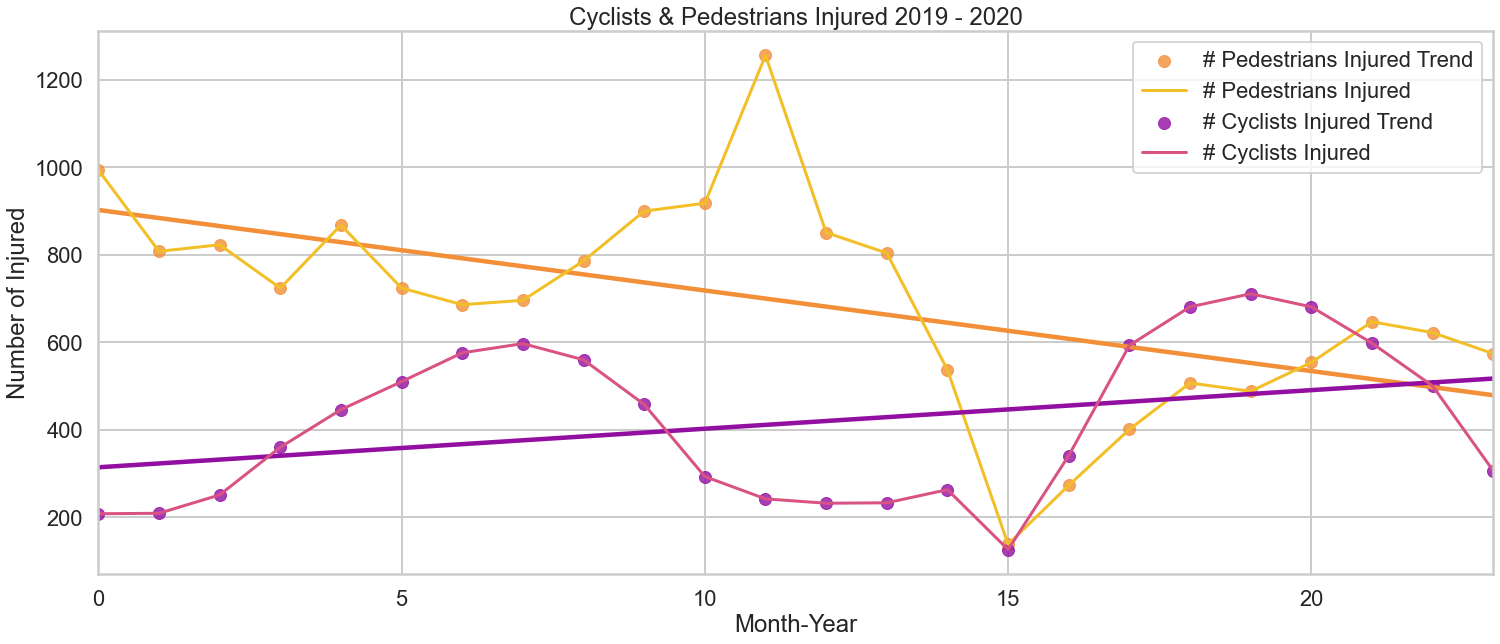

In [563]:
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style("whitegrid")
sns.set_context("poster")

# plot trend line for peds
sns.regplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF PEDESTRIANS INJURED', ci=None,label='# Pedestrians Injured Trend',color="#F28F38")
# plot year_month v injuries for peds
sns.lineplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF PEDESTRIANS INJURED',label='# Pedestrians Injured',color='#F2BF27',linestyle="-")

# plot trend line for cyclists
sns.regplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF CYCLIST INJURED', ci=None,label='# Cyclists Injured Trend',color="#920FA2")
# plot year_month v injuries for cyclists
sns.lineplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF CYCLIST INJURED',label='# Cyclists Injured',color='#D95284',linestyle="-").set(title='Cyclists & Pedestrians Injured 2019 - 2020',xlabel = "Month-Year", ylabel = "Number of Injured")

[Text(0.5, 1.0, 'Cyclists & Pedestrians Killed 2019 - 2020'),
 Text(0.5, 0, 'Month-Year'),
 Text(0, 0.5, 'Number of Killed')]

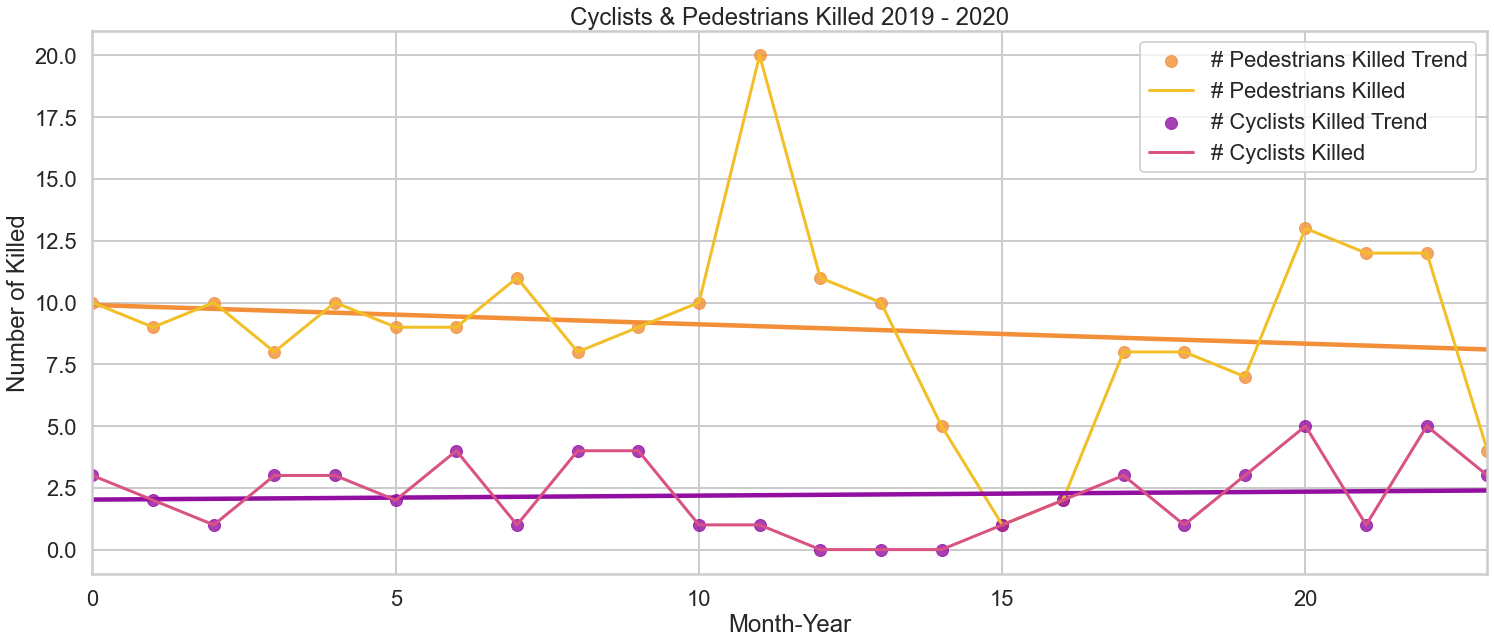

In [565]:
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style("whitegrid")
sns.set_context("poster")

# plot trend line for peds
sns.regplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF PEDESTRIANS KILLED', ci=None,label='# Pedestrians Killed Trend',color="#F28F38")
# plot year_month v injuries for peds
sns.lineplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF PEDESTRIANS KILLED',label='# Pedestrians Killed',color='#F2BF27',linestyle="-")

# plot trend line for cyclists
sns.regplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF CYCLIST KILLED', ci=None,label='# Cyclists Killed Trend',color="#920FA2")
# plot year_month v injuries for cyclists
sns.lineplot(data=year_month_2019_2020_injury,x='MONTH_NUM',y='NUMBER OF CYCLIST KILLED',label='# Cyclists Killed',color='#D95284',linestyle="-").set(title='Cyclists & Pedestrians Killed 2019 - 2020',xlabel = "Month-Year", ylabel = "Number of Killed")

<AxesSubplot:title={'center':'CYCLISTS & PEDESTRIANS INJURED 2019 - 2020'}, xlabel='YEAR-MONTH', ylabel='NUMBER OF CYCLIST INJURED'>

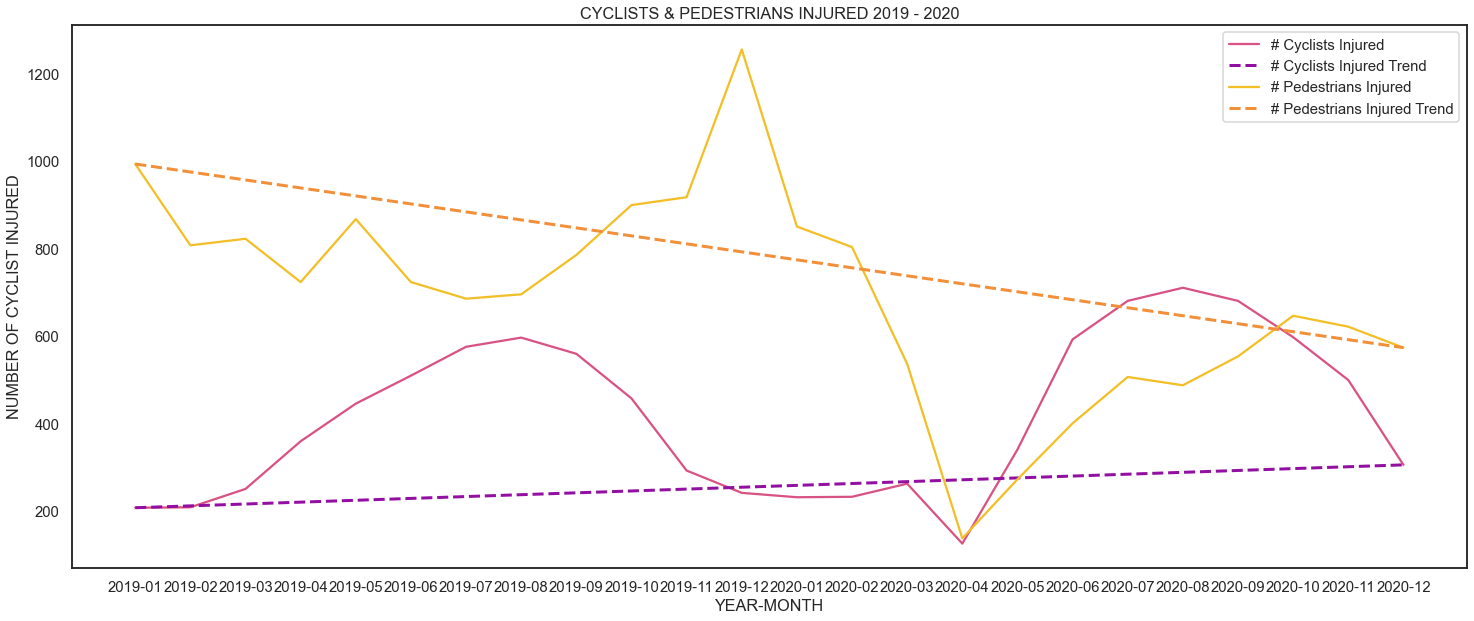

In [514]:
sns.set(rc={'figure.figsize':(25,10)})
sns.set_style("white")
sns.set_context("talk", font_scale=.9)
# plot year_month v injuries for cyclists
sns.lineplot(data=year_month_2019_2020_injury,x='YEAR-MONTH',y='NUMBER OF CYCLIST INJURED',label='# Cyclists Injured',color='#D95284').set(title='CYCLISTS & PEDESTRIANS INJURED 2019 - 2020')
# plot trend line for cyclists
sns.lineplot(data=year_month_2019_trend,x='YEAR-MONTH',y='NUMBER OF CYCLIST INJURED',label='# Cyclists Injured Trend',linestyle='--',linewidth = 3,color="#920FA2")
sns.lmplot(data=year_month_2019_trend,x='YEAR-MONTH',y='NUMBER OF CYCLIST INJURED')
    
# plot year_month v injuries for peds
sns.lineplot(data=year_month_2019_2020_injury,x='YEAR-MONTH',y='NUMBER OF PEDESTRIANS INJURED',label='# Pedestrians Injured',color='#F2BF27')
# plot trend line for peds
sns.lineplot(data=year_month_2019_trend,x='YEAR-MONTH',y='NUMBER OF PEDESTRIANS INJURED',label='# Pedestrians Injured Trend',linestyle='--',linewidth = 3,color="#F28F38")

<AxesSubplot:title={'center':'CYCLISTS & PEDESTRIANS KILLED 2019 - 2020'}, xlabel='YEAR-MONTH', ylabel='NUMBER OF CYCLIST KILLED'>

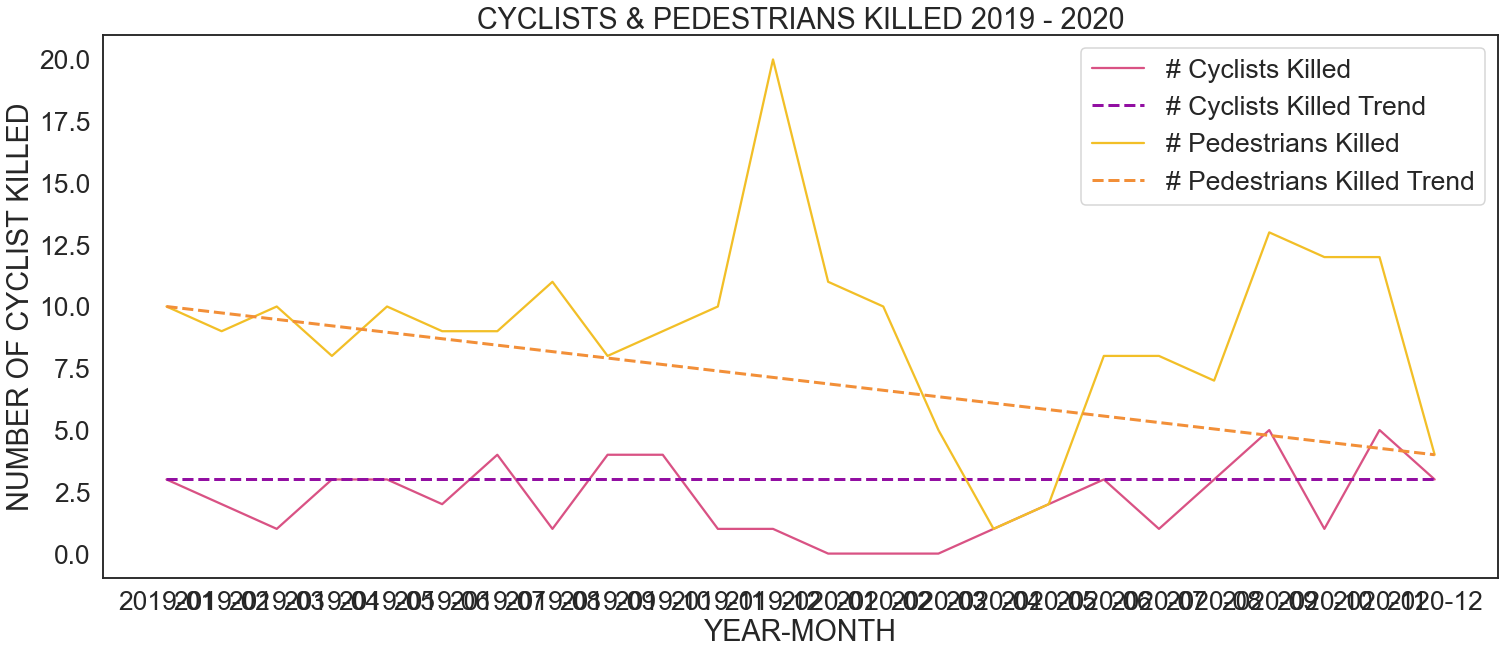

In [496]:
## plot year_month v injuries for cyclists
sns.lineplot(data=year_month_2019_2020_injury,x='YEAR-MONTH',y='NUMBER OF CYCLIST KILLED',label='# Cyclists Killed',color='#D95284').set(title='CYCLISTS & PEDESTRIANS KILLED 2019 - 2020')
# plot trend line for cyclists
sns.lineplot(data=year_month_2019_trend,x='YEAR-MONTH',y='NUMBER OF CYCLIST KILLED',label='# Cyclists Killed Trend',linestyle='--',linewidth = 3,color="#920FA2")


# plot year_month v injuries for peds
sns.lineplot(data=year_month_2019_2020_injury,x='YEAR-MONTH',y='NUMBER OF PEDESTRIANS KILLED',label='# Pedestrians Killed',color='#F2BF27')
# plot trend line for peds
sns.lineplot(data=year_month_2019_trend,x='YEAR-MONTH',y='NUMBER OF PEDESTRIANS KILLED',label='# Pedestrians Killed Trend',linestyle='--',linewidth = 3,color="#F28F38")

In [227]:
yearly_num_injured_or_killed.index

RangeIndex(start=0, stop=3, step=1)

In [203]:
plt.bar(yearly_num_injured_or_killed['NUMBER OF CYCLIST INJURED'],)

TypeError: bar() missing 1 required positional argument: 'height'

In [275]:
crash_data['BICYCLE_INVOLVED 1'] = crash_data['VEHICLE TYPE CODE 1']=='BICYCLE'
crash_data['BICYCLE_INVOLVED 2'] = crash_data['VEHICLE TYPE CODE 2']=='BICYCLE'
crash_data['BICYCLE_INVOLVED 3'] = crash_data['VEHICLE TYPE CODE 3']=='BICYCLE'
crash_data['BICYCLE_INVOLVED 4'] = crash_data['VEHICLE TYPE CODE 4']=='BICYCLE'
crash_data['BICYCLE_INVOLVED 5'] = crash_data['VEHICLE TYPE CODE 5']=='BICYCLE'
crash_data['BICYCLE_INVOLVED TOTAL'] = crash_data['BICYCLE_INVOLVED 1']+crash_data['BICYCLE_INVOLVED 2']+crash_data['BICYCLE_INVOLVED 3']+crash_data['BICYCLE_INVOLVED 4']+crash_data['BICYCLE_INVOLVED 5']

crash_data['EBIKE_INVOLVED 1'] = crash_data['VEHICLE TYPE CODE 1']=='EBIKE'
crash_data['EBIKE_INVOLVED 2'] = crash_data['VEHICLE TYPE CODE 2']=='EBIKE'
crash_data['EBIKE_INVOLVED 3'] = crash_data['VEHICLE TYPE CODE 3']=='EBIKE'
crash_data['EBIKE_INVOLVED 4'] = crash_data['VEHICLE TYPE CODE 4']=='EBIKE'
crash_data['EBIKE_INVOLVED 5'] = crash_data['VEHICLE TYPE CODE 5']=='EBIKE'
crash_data['EBIKE_INVOLVED TOTAL'] = crash_data['EBIKE_INVOLVED 1']+crash_data['EBIKE_INVOLVED 2']+crash_data['EBIKE_INVOLVED 3']+crash_data['EBIKE_INVOLVED 4']+crash_data['EBIKE_INVOLVED 5']

yearly_bike_ebike = crash_data.groupby('YEAR', as_index=False).agg({'BICYCLE_INVOLVED TOTAL':sum,'EBIKE_INVOLVED TOTAL':sum})
yearly_bike_ebike

# num bike involved decreased, num ebike involved increases

,YEAR,BICYCLE_INVOLVED TOTAL,EBIKE_INVOLVED TOTAL
0,2019,5638,241
1,2020,4889,880
2,2021,3788,2041


<AxesSubplot:xlabel='YEAR', ylabel='BICYCLE_INVOLVED TOTAL'>

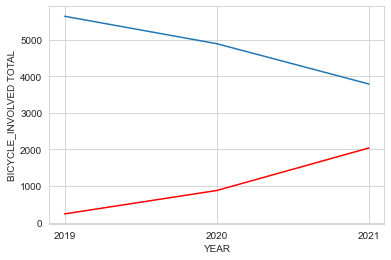

In [309]:
sns.lineplot(data=yearly_bike_ebike,x='YEAR',y='BICYCLE_INVOLVED TOTAL',legend='auto',)

sns.lineplot(data=yearly_bike_ebike,x='YEAR',y='EBIKE_INVOLVED TOTAL',legend='auto',color="r")